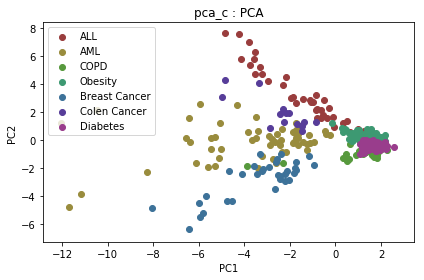

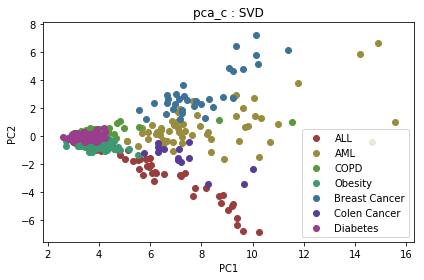

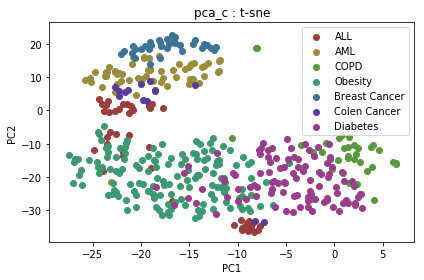

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import colorsys
import heapq

def loadData (file_name):
    #Load the data set    
    results = []
    with open(file_name) as inputfile:
        for line in inputfile:
            results.append(line.strip().split('\t'))
    
    # Data preprocesing        
    myArray = np.asarray(results)
    
    #Separate the raw data into inputs and labels
    myInput = np.delete(myArray, -1, axis=1)
    inp = myInput.astype(np.float) 
    labels = myArray[:,myArray.shape[1]-1]
    return inp,labels

def plot(dim_red,labels,algo,inpu) :
    
    RGBcolors = []
    # Get the list of the diseases
    for i in range(labels.shape[0]) :
        disease = set(labels)
    diseases = list(disease)
    
    #Compute the colors
    for x in range(len(diseases)) :
        HSV = [(x*1.0/len(diseases), 0.6, 0.6) ]
        RGBcolors.append(map(lambda x:colorsys.hsv_to_rgb(*x), HSV))
        
    dis_col = zip(diseases,RGBcolors)
    fil,ext=inpu.split(".")
    
    # Scatter plot   
    for name,color in dis_col :
        plt.scatter(
        dim_red[labels==name,0],
        dim_red[labels==name,1],
        label=name,
        c=color,
        )
    plt.title(algo)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(loc='best')
    plt.title(fil + " " + ":" + " " + algo)
    plt.tight_layout()
    plt.show()
              
#This function implements the PCA algorithm
def pca(inpu) :

    #PCA Algorithm
    #Load the data
    inp,labels = loadData(inpu)
    
    # Compute and subtract the mean from input data
    arrayMean = np.mean(inp,axis=0,keepdims=True)
    covInp = np.subtract(inp,arrayMean)

    
    #Find the covariance matrix of the mean substracted matrix 
    cov = np.cov(covInp.T)
   
    #Compute the eigen vectors and values
    e_vals, e_vecs = np.linalg.eig(cov)  
    e_vals = e_vals.reshape((e_vals.shape[0], 1))

    #sort the eigen values in descending order
    res_sorted = np.asarray(sorted(e_vals, reverse=True))
    res = heapq.nlargest(2, xrange(len(e_vals)), key=e_vals.__getitem__)
    
    # Below is the eigen vector-array sorted in desc order - take the top 2 columns
    top_two = e_vecs[:,res]
    dim_red = np.dot(covInp,top_two)
    
    plot(dim_red,labels,"PCA",inpu) 

#This function implements the SVD algorithm.
def svd(inpu) :
    inp,labels = loadData(inpu)
#     arrayMean = np.mean(inp,axis=0,keepdims=True)
#     covInp = np.subtract(inp,arrayMean)
    svd =TruncatedSVD(n_components=2)
    dim_red = svd.fit_transform(inp)
    plot(dim_red,labels,"SVD",inpu)

#This function implements the t_sne algorithm
def t_sne(inpu) :
    inp,labels = loadData(inpu)
    t_sne = TSNE(n_components=2)
    dim_red = t_sne.fit_transform(inp)
    plot(dim_red,labels,"t-sne",inpu)
    
# Load the input data set
inpu = "pca_c.txt"

#Function calls
pca(inpu)
svd(inpu)
t_sne(inpu)
